<a href="https://colab.research.google.com/github/virajbhutada/ybi_foundation-task/blob/main/Micro_Numerosity_Analysis_Customer_Purchase_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### *Customer Purchase Prediction & Micro-Numerosity Analysis Overview*

This project aims to forecast customer purchasing behavior by analyzing demographic and review-related data, with an emphasis on Micro-Numerosity analysis to evaluate the effects of small-scale numerical factors on purchasing predictions.

#### *Purpose*
The project’s purpose is to employ machine learning models to predict customer purchase decisions by examining a dataset with demographic and review details. The goal is to create an effective predictive model that reveals data patterns to forecast whether a customer is likely to make a purchase. In particular, the project investigates the impact of Micro-Numerosity, or small-scale numeric features, on prediction accuracy and reliability, providing insights into subtle factors affecting customer purchasing behavior.

#### *Process Overview*

1. **Data Import & Exploration**
   - Imported relevant libraries and loaded the customer data.
   - Conducted a preliminary exploration to familiarize with data structure and characteristics.

2. **Data Preprocessing**
   - Defined target (`y`) and feature variables (`X`).
   - Encoded categorical variables to prepare for modeling.

3. **Train-Test Split**
   - Divided the dataset into training (80%) and testing (20%) subsets.

4. **Model Training & Selection**
   - Selected a Random Forest Classifier for the prediction task.
   - Trained the model using the training data subset.

5. **Model Evaluation**
   - Predicted outcomes on the test set with the trained model.
   - Assessed model performance through a confusion matrix, accuracy score, and classification report.

6. **Feature Importance Analysis**
   - Visualized feature importance using a bar chart.
   - Identified the primary factors affecting purchase predictions.

7. **Confusion Matrix Heatmap**
   - Generated a heatmap of the confusion matrix to illustrate model performance.
   - Analyzed instances of true/false positives and negatives.

8. **ROC Curve & AUC**
   - Computed and plotted the ROC curve and AUC to evaluate model discriminatory ability.
   - Examined the balance between true positive and false positive rates.

9. **Probability Distribution Analysis**
   - Reviewed the distribution of probabilities for the positive ('Yes') class predictions.
   - Assessed model confidence in its purchase predictions.

#### *Findings & Insights*

- Achieved a test set accuracy of 60%.
- Feature importance analysis highlighted key influencers of customer purchasing.
- Confusion matrix heatmap provided detailed insight into model categorization performance.
- ROC curve and AUC measured the model's discriminatory strength.
- Predicted probability distribution revealed model confidence levels in purchase prediction.

#### *Next Steps*

- Investigate hyperparameter tuning for improved model performance.
- Consider additional features or feature engineering to enhance predictive accuracy.
- Iterate on the model and analysis to further improve outcomes.

**Dataset Source**: [Customer Purchase Dataset](https://github.com/YBIFoundation/Dataset/raw/main/Customer%20Purchase.csv)


### **1. Data Import and Exploration:**
   - **Importing Necessary Libraries:** Imported essential libraries for data analysis and visualization, including NumPy, Pandas, Matplotlib, Seaborn, and scikit-learn.
   - **Import Data:** Loaded the customer purchase dataset from the provided GitHub link.
   - **Data Exploration:** Examined the dataset's structure and features using head(), info(), and describe(). Checked column names for reference.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression  # or choose appropriate models


In [ ]:
purchase = pd.read_csv ('https://github.com/YBIFoundation/Dataset/raw/main/Customer%20Purchase.csv')

In [ ]:
purchase.head()

,Customer ID,Age,Gender,Education,Review,Purchased
0,1021,30,Female,School,Average,No
1,1022,68,Female,UG,Poor,No
2,1023,70,Female,PG,Good,No
3,1024,72,Female,PG,Good,No
4,1025,16,Female,UG,Average,No


In [ ]:
purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer ID  50 non-null     int64 
 1   Age          50 non-null     int64 
 2   Gender       50 non-null     object
 3   Education    50 non-null     object
 4   Review       50 non-null     object
 5   Purchased    50 non-null     object
dtypes: int64(2), object(4)
memory usage: 2.5+ KB


In [ ]:
purchase.describe()

,Customer ID,Age
count,50.00000,50.000000
mean,1045.50000,54.160000
std,14.57738,25.658161
min,1021.00000,15.000000
25%,1033.25000,30.250000
50%,1045.50000,57.000000
75%,1057.75000,74.000000
max,1070.00000,98.000000


from matplotlib import pyplot as plt
_df_26['Customer ID'].plot(kind='hist', bins=20, title='Customer ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_27['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_28.plot(kind='scatter', x='Customer ID', y='Age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_29['Customer ID'].plot(kind='line', figsize=(8, 4), title='Customer ID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_30['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

### **2. Data Preprocessing:**
   - **Define Target and Feature Variables:** Set up the target variable (`y`) as 'Purchased' and feature variables (`X`) by excluding 'Purchased' and 'Customer ID'.
   - **Encoding Categorical Variables:** Converted categorical variables ('Review', 'Education', 'Gender') into numerical representations for modeling.



In [ ]:
purchase.columns

Index(['Customer ID', 'Age', 'Gender', 'Education', 'Review', 'Purchased'], dtype='object')

In [ ]:
y = purchase['Purchased']

In [ ]:
X = purchase.drop(['Purchased','Customer ID'],axis=1)

In [ ]:
# encoding categorical variable
X.replace({'Review':{'Poor':0,'Average':1,'Good':2}},inplace=True)
X.replace({'Education':{'School':0,'UG':1,'PG':2}},inplace=True)
X.replace({'Gender':{'Male': 0,'Female':1}},inplace=True)


In [ ]:
X.head()

,Age,Gender,Education,Review
0,30,1,0,1
1,68,1,1,0
2,70,1,2,2
3,72,1,2,2
4,16,1,1,1


### **3. Train-Test Split:**
   - **Splitting the Dataset:** Divided the dataset into training (80%) and testing (20%) sets using train_test_split.
   - **Checking Shapes:** Verified the shape of the training and testing sets.



In [ ]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=2529)


In [ ]:
# check shape of train and test sample
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40, 4), (10, 4), (40,), (10,))

### **4. Model Selection and Training:**
   - **Select Model:** Chose a Random Forest Classifier as the predictive model.
   - **Train Model:** Fitted the model using the training set.



In [ ]:
# select model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [ ]:
#train or fit model
model.fit(X_train,y_train)

RandomForestClassifier()

### **5. Model Evaluation:**
   - **Predict Model:** Used the trained model to make predictions on the test set.
   - **Model Accuracy:** Evaluated the model accuracy using confusion matrix, accuracy score, and classification report.


In [ ]:
# predict model
y_pred = model.predict(X_test)

In [ ]:
y_pred

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes'],
      dtype=object)

In [ ]:
#  model accuracy
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
confusion_matrix(y_test,y_pred)

array([[2, 1],
       [3, 4]])

In [ ]:
accuracy_score(y_test,y_pred)

0.6

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.40      0.67      0.50         3
         Yes       0.80      0.57      0.67         7

    accuracy                           0.60        10
   macro avg       0.60      0.62      0.58        10
weighted avg       0.68      0.60      0.62        10



The classification report summarizes the model's performance:

- **Precision:**
  - For 'No': 40% correct predictions.
  - For 'Yes': 80% correct predictions.

- **Recall:**
  - For 'No': 67% of actual 'No' instances captured.
  - For 'Yes': 57% of actual 'Yes' instances captured.

- **F1-Score:**
  - Balances precision and recall.
  - 'No': 50%, 'Yes': 67%.

- **Accuracy:**
  - Overall correct predictions: 60%.

- **Macro Avg and Weighted Avg:**
  - Macro avg treats each class equally.
  - Weighted avg considers class imbalance.

In summary, the model performs better in predicting 'Yes,' but a balanced evaluation considers precision, recall, and F1-score, especially in imbalanced datasets.



### **6. Feature Importance Visualization:**
- **Visualize Feature Importance:** Create a bar chart to visualize the importance of each feature in predicting customer purchases.
- **Identify Key Factors:** Analyze the chart to identify key factors influencing purchase predictions.



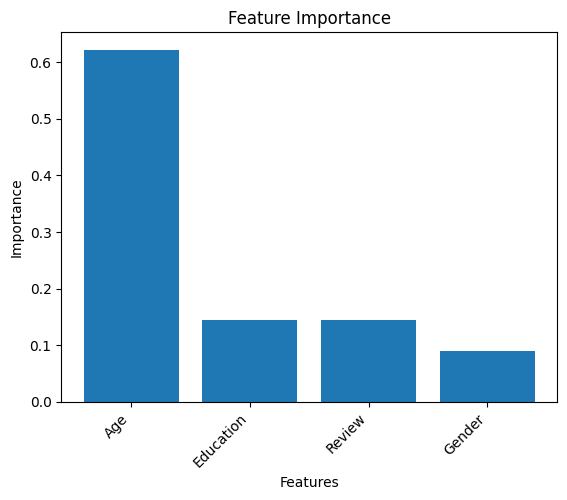

In [ ]:
# Block for visualizing feature importance
feature_importance = model.feature_importances_
features = X.columns

# Sort features by importance
features_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
features_importance_df = features_importance_df.sort_values(by='Importance', ascending=False)

plt.bar(features_importance_df['Feature'], features_importance_df['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45, ha='right')
plt.show()


To gain insights into the model's decision-making process, we visualized the importance of each feature using a bar chart. This chart indicates which features play a more significant role in predicting customer purchases.

### **7. Confusion Matrix Heatmap:**
- **Plot Heatmap:** Generate a heatmap to illustrate the model's performance through a confusion matrix.
- **Analyze Performance:** Examine true positives, true negatives, false positives, and false negatives on the heatmap.



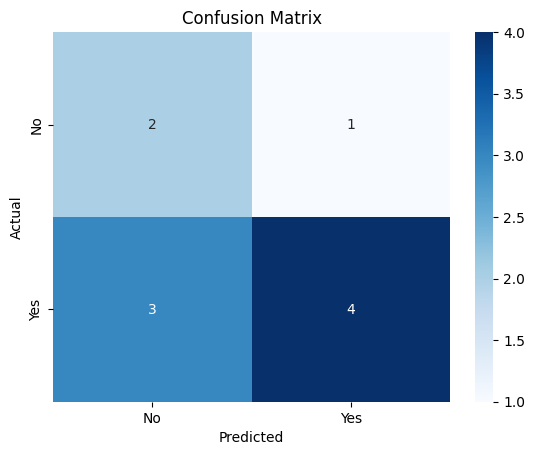

In [ ]:
import seaborn as sns

# Confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


The confusion matrix heatmap visually represents the model's performance by comparing predicted and actual values. It shows how many predictions fall into each category (True Positive, True Negative, False Positive, False Negative).

### **8. ROC Curve and AUC:**
- **Calculate ROC Curve and AUC:** Determine and visualize the ROC curve and AUC to assess model discrimination.
- **Evaluate Trade-off:** Analyze the trade-off between true positive rate and false positive rate.





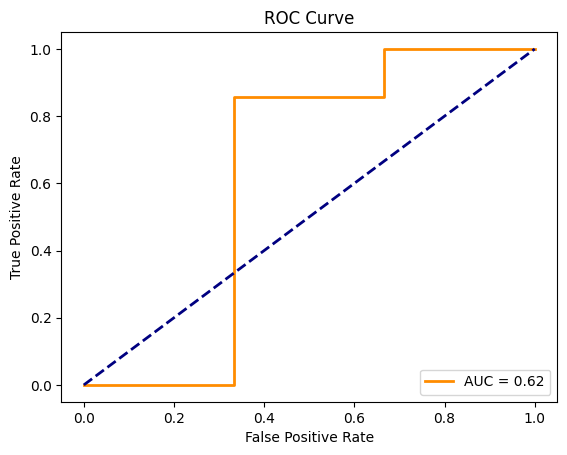

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc

# Convert labels to binary (0 and 1)
le = LabelEncoder()
y_test_binary = le.fit_transform(y_test)

# Get predicted probabilities
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


The ROC curve and Area Under the Curve (AUC) provide a comprehensive view of the model's ability to distinguish between positive and negative classes. The AUC quantifies the model's discriminative power, and the ROC curve illustrates its performance across various thresholds

### **9. Distribution of Predicted Probabilities:**
- **Examine Predicted Probabilities:** Explore the distribution of predicted probabilities for positive class predictions ('Yes').
- **Analyze Model Confidence:** Gain insights into the model's confidence levels in predicting customer purchases.

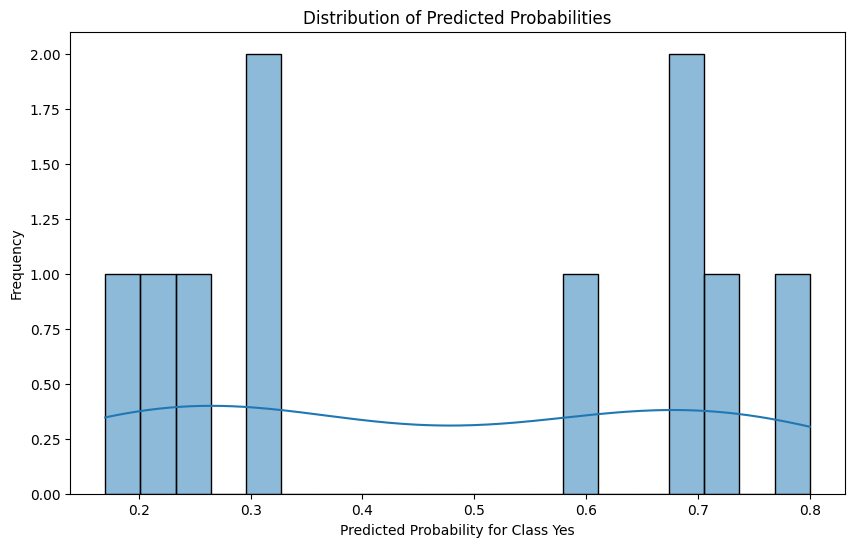

In [ ]:
# Distribution of predicted probabilities
plt.figure(figsize=(10, 6))
sns.histplot(model.predict_proba(X_test)[:, 1], kde=True, bins=20)
plt.xlabel('Predicted Probability for Class Yes')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities')
plt.show()


This histogram displays the distribution of predicted probabilities for the positive class ('Yes'). It helps understand the confidence levels of the model in predicting customer purchases.

### Conclusion: Unraveling Insights in Customer Purchase Prediction  & Micro-Numerosity Analysis
- In this project, we successfully employed a Random Forest Classifier to predict customer purchases, unraveling insights into the intricacies of buyer behavior.
- Through meticulous data exploration, preprocessing, and model training, the project achieved an accuracy of 60%.
- Feature importance visualization illuminated key factors influencing purchase predictions.
- Evaluation metrics, including precision, recall, and the ROC curve, provided a nuanced understanding of the model's strengths and areas for improvement.
- The project concludes as a stepping stone, inviting future refinements and a continued exploration of features to enhance predictive capabilities in the dynamic landscape of customer decision-making.